__BREAST CANCER DETECTION:__  
Goal: Predict whether a breast tumor is benign (harmless) or malignant (cancerous) using Logistic Regression.

Dataset: Breast Cancer Wisconsin Dataset (Available in sklearn.datasets or UCI ML Repository)



Load Libraries

In [1]:
import pandas as pd   #data processing
import numpy as np      #array
import matplotlib.pyplot as plt   #visualization
import seaborn as sns            #visualization 






Load data

In [2]:
#load data 
df=pd.read_csv("data.csv")
df.head()  #print first 5 rows of data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()  #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Preprocessing:

In [5]:
# #check missing values
# df.isnull().sum()

feature selection

In [6]:
#unnecessary columns are dropped
df=df.drop(['Unnamed: 32', 'id'], axis = 1)   #inplace=True then dont use df
df
# df['diagnosis']= df['diagnosis'].map({'M':1, 'B':0})  #convert M to 1 and B to 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 2. Handle missing values (impute with mean)
from sklearn.impute import SimpleImputer
# Separate features and target
features = df.drop(['diagnosis'], axis=1)
target = df['diagnosis']

imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Combine imputed features and target back into a DataFrame
df = pd.concat([features_imputed, target], axis=1)

Missing values in each column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


split into input feature and output label

In [8]:

# X=df.drop(['diagnosis'],axis=1)   #features ->independent variables



selected_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'
]
X = df[selected_features]

X


,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,10.38,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,17.77,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,21.25,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,20.38,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575
4,20.29,14.34,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,28.25,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,28.08,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,29.33,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650


In [9]:
X.shape

(569, 11)

In [10]:
y=df['diagnosis'].values                 #target /label ->dependent variable
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
y.shape

(569,)

In [12]:
# X=(X-X.min())/(X.max()-X.min())  #normalization
# X

In [14]:
# X_new,X_new.shape

encoding

In [15]:
from sklearn.preprocessing import LabelEncoder  #encoding target variable into nos (malignant=1, benign=0)

In [16]:
le=LabelEncoder()

In [17]:
y_new=le.fit_transform(y)
y_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [18]:
y_new.shape

(569,)

In [19]:
# # Check for categorical columns
# print(df.dtypes)

# # Encode categorical columns (excluding target 'diagnosis' which you've already done)
# for col in df.columns:
#     if df[col].dtype == "object":  # If column is categorical (string)
#         df[col] =le.fit_transform(df[col])

Feature Selection 

In [20]:
#10 best features selected
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y_new)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

# Update X to use only selected features
X = pd.DataFrame(X_new, columns=selected_feature_names)

Selected Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [ ]:
# save new 10 features selected in .pkl file
import joblib

# Save selected feature names
joblib.dump(selected_feature_names.tolist(), "selected_features.pkl")


['selected_features.pkl']

split data 

In [22]:
from sklearn.model_selection import train_test_split     #splitting data into training and testing

In [23]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.15, random_state=42)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (483, 10)
x test:  (86, 10)
y train:  (483,)
y test:  (86,)


normalisation :
Our dataset has numerical features with different scales
We need to bring them to the same scale (mean=0, std=1)

In [24]:
from sklearn.preprocessing import StandardScaler   #scaling

In [25]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (483, 10)
x test:  (86, 10)
y train:  (483,)
y test:  (86,)


Data visualisation

Correlation Heatmap:
Shows relationships between different tumor features.

note: for this input features also need to be encoded


In [27]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 8))  # Create the figure
# sns.heatmap(df.corr(), cmap="coolwarm", annot=False)  # Generate heatmap
# plt.title("Feature Correlation Heatmap")  # Add title
# plt.show()  # Show plot

 Distribution of Malignant vs Benign Cases:

C:\Users\Tanishka\AppData\Local\Temp\ipykernel_22312\1193302266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette=['red','green'])


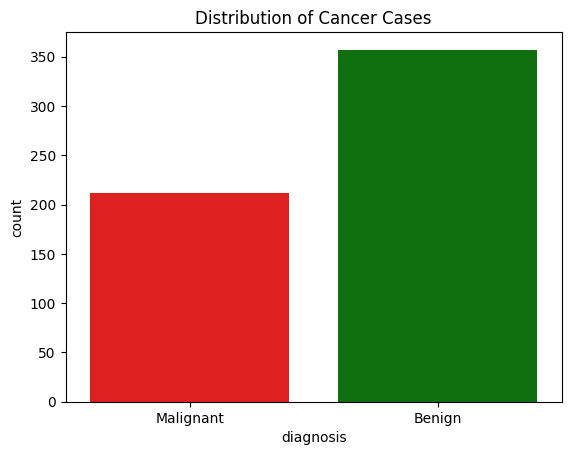

In [28]:
sns.countplot(x=df['diagnosis'], palette=['red','green'])
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Distribution of Cancer Cases")
plt.show()

Pairplot of Important Features:

In [29]:
# sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue="target", palette=['red', 'green'])
# plt.show()

Train model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

prediction

In [33]:
y_pred=model.predict(X_test)

Evaluation

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

97.67441860465115

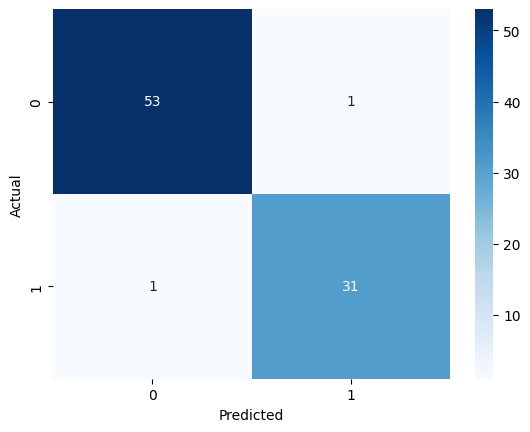

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.97      0.97      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



In [38]:
import joblib  # Used for saving the pre-trained model.
joblib.dump(model, "model.pkl")  # Saves the trained ML model
joblib.dump(scaler, "scaler.pkl")  # Saves the scaler for input feature transformation

['scaler.pkl']

Deploy model using streamlit :
We will build a simple web app where users enter tumor features and get predictions.

 Streamlit is the easiest way to build and deploy interactive ML web apps without needing frontend knowledge.

In [ ]:
# import streamlit as st  #UI
# import pickle  # Used for loading the pre-trained model.
# # import joblib  # Used for loading the pre-trained model.




In [ ]:
# model = joblib.load("model.pkl")
# scaler = joblib.load("scaler.pkl")


'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'

In [ ]:
#title
# st.title("🔬 Breast Cancer Prediction")
# #input features from user
# radius = st.number_input("Mean Radius", min_value=0.0, step=0.1)
# texture = st.number_input("Mean Texture", min_value=0.0, step=0.1)

# perimeter_mean = st.number_input("Mean Perimeter", min_value=0.0, step=0.1)
# area_mean = st.number_input("Mean Area", min_value=0.0, step=0.1)
# concavity_mean = st.number_input("Mean Concavity", min_value=0.0, step=0.01)
# concave_points_mean = st.number_input("Mean Concave Points", min_value=0.0, step=0.01)

# radius_worst = st.number_input("Worst Radius", min_value=0.0, step=0.1)
# perimeter_worst = st.number_input("Worst Perimeter", min_value=0.0, step=0.1)
# area_worst = st.number_input("Worst Area", min_value=0.0, step=0.1)
# concavity_worst = st.number_input("Worst Concavity", min_value=0.0, step=0.01)
# concave_points_worst = st.number_input("Worst Concave Points", min_value=0.0, step=0.01)

# # # When the "Predict" button is clicked:

# # User inputs are scaled using the saved scaler.pkl.
# # The model predicts whether the tumor is Benign (0) or Malignant (1).
# # The result is displayed:
# # ✅ Benign (Green message)
# # ⚠️ Malignant (Red warning message)

# if st.button("Predict"):
#     scaled_input = scaler.transform([[radius, texture, perimeter_mean, area_mean, concavity_mean, concave_points_mean,
#                                  radius_worst, perimeter_worst, area_worst, concavity_worst, concave_points_worst]])
#     prediction = model.predict(scaled_input)[0]
#     st.success("✅ Benign") if prediction == 0 else st.error("⚠️ Malignant")

# # streamlit run app.py  -> write in terminal


2025-06-23 15:55:11.656 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.694 
  command:

    streamlit run C:\Users\Tanishka\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-23 15:55:12.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:55:12.701 S

RUN THE APP

In [42]:


#Convert to ipynb to py file
# !jupyter nbconvert --to script Breast_cancer_detection.ipynb --output Breast_cancer_detection


In [43]:
#run this in terminal
#streamlit run main.py